In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv('HRTrain.csv')
df_test=pd.read_csv('HRTest.csv')

In [3]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
print(df_train.shape)
print(df_test.shape)

(54808, 14)
(23490, 13)


In [6]:
df=df_train.append(df_test,sort=False)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [7]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [8]:
df['education'].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [9]:
df['education']=df['education'].fillna("Bachelor's")

In [10]:
df['previous_year_rating'].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             78298 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


In [12]:
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].mean())

In [13]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [14]:
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005216,0.000586,0.001320,0.004420,0.000127,0.005943,-0.003930,0.001206
no_of_trainings,-0.005216,1.000000,-0.082536,-0.055326,-0.058403,-0.043912,-0.004818,0.044180,-0.024896
age,0.000586,-0.082536,1.000000,0.008681,0.653339,-0.026223,-0.007357,-0.044592,-0.017166
previous_year_rating,0.001320,-0.055326,0.008681,1.000000,0.001005,0.337397,0.026574,0.068801,0.153404
length_of_service,0.004420,-0.058403,0.653339,0.001005,1.000000,-0.077854,-0.040556,-0.035272,-0.010670
KPIs_met >80%,0.000127,-0.043912,-0.026223,0.337397,-0.077854,1.000000,0.100365,0.076729,0.221582
awards_won?,0.005943,-0.004818,-0.007357,0.026574,-0.040556,0.100365,1.000000,0.072655,0.195871
avg_training_score,-0.003930,0.044180,-0.044592,0.068801,-0.035272,0.076729,0.072655,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153404,-0.010670,0.221582,0.195871,0.181147,1.000000


In [15]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [17]:
df["department"]=encoder.fit_transform(df['department'])
df["education"]=encoder.fit_transform(df['education'])
df["gender"]=encoder.fit_transform(df['gender'])
df["recruitment_channel"]=encoder.fit_transform(df['recruitment_channel'])
df["region"]=encoder.fit_transform(df['region'])

In [18]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
23485,53478,3,11,1,1,2,1,24,3.000000,1,0,0,61,NaN
23486,25600,8,17,0,1,2,1,31,3.000000,7,0,0,74,NaN
23487,45409,2,7,0,0,2,1,26,4.000000,4,0,0,50,NaN
23488,1186,5,24,0,1,2,3,27,3.332219,1,0,0,70,NaN
23489,5973,8,8,2,1,0,3,40,5.000000,5,1,0,89,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  int32  
 2   region                78298 non-null  int32  
 3   education             78298 non-null  int32  
 4   gender                78298 non-null  int32  
 5   recruitment_channel   78298 non-null  int32  
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int32(5), int64(7)
memory usage: 7.5 MB


In [20]:
df.shape

(78298, 14)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['employee_id', 'age', 'length_of_service', 'region', 'avg_training_score','department']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [22]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.835754,0.875,0.939394,2,0,2,1,0.375,5.0,0.194444,1,0,0.166667,0.0
1,0.831960,0.500,0.424242,0,1,0,1,0.250,5.0,0.083333,0,0,0.350000,0.0
2,0.095942,0.875,0.303030,0,1,2,1,0.350,3.0,0.166667,0,0,0.183333,0.0
3,0.032453,0.875,0.454545,0,1,0,2,0.475,1.0,0.250000,0,0,0.183333,0.0
4,0.625107,1.000,0.545455,0,1,0,1,0.625,3.0,0.027778,0,0,0.566667,0.0


In [23]:
df_Train=df[0:54808]
df_Test=df[54808:]

In [24]:
df_Train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.835754,0.875,0.939394,2,0,2,1,0.375,5.0,0.194444,1,0,0.166667,0.0
1,0.831960,0.500,0.424242,0,1,0,1,0.250,5.0,0.083333,0,0,0.350000,0.0
2,0.095942,0.875,0.303030,0,1,2,1,0.350,3.0,0.166667,0,0,0.183333,0.0
3,0.032453,0.875,0.454545,0,1,0,2,0.475,1.0,0.250000,0,0,0.183333,0.0
4,0.625107,1.000,0.545455,0,1,0,1,0.625,3.0,0.027778,0,0,0.566667,0.0


In [25]:
df_Train['is_promoted']=df_Train['is_promoted'].astype(int)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  float64
 1   department            54808 non-null  float64
 2   region                54808 non-null  float64
 3   education             54808 non-null  int32  
 4   gender                54808 non-null  int32  
 5   recruitment_channel   54808 non-null  int32  
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  float64
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  float64
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  float64
 13  is_promoted           54808 non-null  int32  
dtypes: float64(7), int32(4), int64(3)
memory usage: 5.4 MB


In [27]:
df_Test=df_Test.drop(['is_promoted'],axis=1)

In [28]:
print(df_Train.shape)
print(df_Test.shape)

(54808, 14)
(23490, 13)


In [29]:
X=df_Train.drop(['is_promoted'],axis=1)
y=df_Train[['is_promoted']]

In [30]:
X.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.835754,0.875,0.939394,2,0,2,1,0.375,5.0,0.194444,1,0,0.166667
1,0.831960,0.500,0.424242,0,1,0,1,0.250,5.0,0.083333,0,0,0.350000
2,0.095942,0.875,0.303030,0,1,2,1,0.350,3.0,0.166667,0,0,0.183333
3,0.032453,0.875,0.454545,0,1,0,2,0.475,1.0,0.250000,0,0,0.183333
4,0.625107,1.000,0.545455,0,1,0,1,0.625,3.0,0.027778,0,0,0.566667


In [31]:
y.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1722,random_state=7)

In [167]:
from catboost import CatBoostClassifier
CB = CatBoostClassifier(iterations=99,verbose=True,eval_metric="F1",
                                    learning_rate=0.38,class_weights=[1,3],depth=5,l2_leaf_reg=100,bagging_temperature=0.6)

CB.fit(X_train,y_train)

0:	learn: 0.3175145	total: 6.28ms	remaining: 616ms
1:	learn: 0.3352470	total: 11.8ms	remaining: 574ms
2:	learn: 0.2882844	total: 17.6ms	remaining: 562ms
3:	learn: 0.3032140	total: 22.9ms	remaining: 543ms
4:	learn: 0.2880859	total: 28.4ms	remaining: 534ms
5:	learn: 0.3157454	total: 33.5ms	remaining: 519ms
6:	learn: 0.3339564	total: 38.8ms	remaining: 510ms
7:	learn: 0.3429160	total: 43.8ms	remaining: 498ms
8:	learn: 0.3538722	total: 48.4ms	remaining: 484ms
9:	learn: 0.3805250	total: 53.1ms	remaining: 472ms
10:	learn: 0.4233926	total: 57.5ms	remaining: 460ms
11:	learn: 0.4291217	total: 62.7ms	remaining: 455ms
12:	learn: 0.4329148	total: 67.4ms	remaining: 446ms
13:	learn: 0.4336842	total: 71.8ms	remaining: 436ms
14:	learn: 0.4338409	total: 76.4ms	remaining: 428ms
15:	learn: 0.4489262	total: 80.9ms	remaining: 420ms
16:	learn: 0.4445286	total: 85.4ms	remaining: 412ms
17:	learn: 0.4397245	total: 90ms	remaining: 405ms
18:	learn: 0.4441613	total: 94.5ms	remaining: 398ms
19:	learn: 0.4459948	tot

In [168]:
pred = CB.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.9315532951896588
[[8457  223]
 [ 423  335]]


In [169]:
import xgboost as xgb
xgb = xgb.XGBClassifier(max_depth=3,learning_rate=0.29999,random_state=3,n_estimators=116,min_child_weight=2)

xgb.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.29999, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=116, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=3, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [170]:
pred1 = xgb.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test, pred1))
print(confusion_matrix(y_test, pred1))

0.9458571731299004
[[8661   19]
 [ 492  266]]


In [171]:
y_score1 = CB.predict_proba(X_test)[:,1]
y_score2 = xgb.predict_proba(X_test)[:,1]

roc_auc_score for Catboost:  0.9049106762885595
roc_auc_score for XGboost:  0.9040708631737656


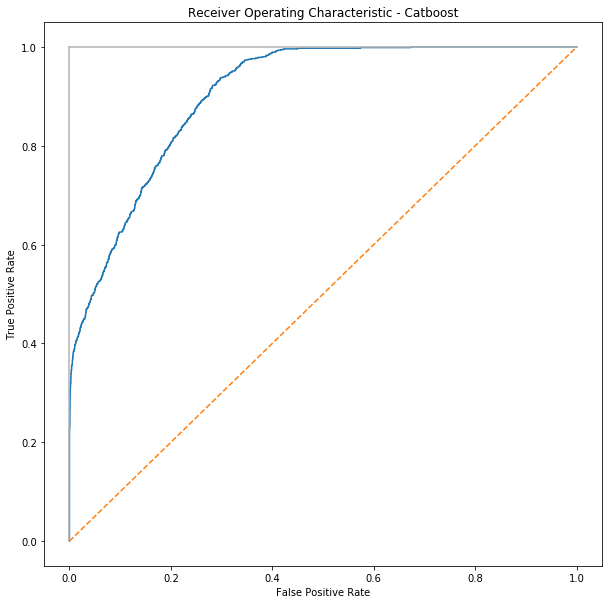

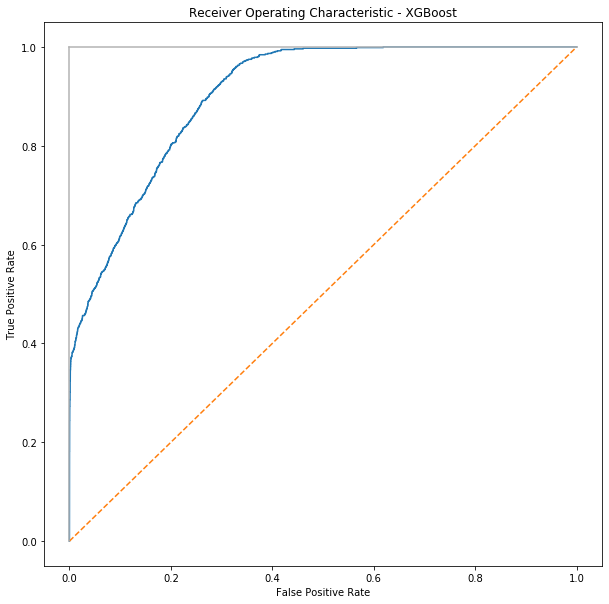

In [172]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

print('roc_auc_score for Catboost: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for XGboost: ', roc_auc_score(y_test, y_score2))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Catboost')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"),plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"),plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [165]:
prediction = CB.predict(df_Test)

In [166]:
pred1=pd.DataFrame(prediction)
sub_df=pd.read_csv('sample_submission_HR.csv')
datasets=pd.concat([sub_df['employee_id'],pred1],axis=1)
datasets.columns=['employee_id','is_promoted']
datasets.to_csv('HR.csv',index=False)